In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
                                                                                                                                                                                                                                                                                                                    


# 1. Business Understanding

As for first time to try out, I chose to explore an AirBNB dataset of Seattle company. It was exciting experience cleansing guest data and finding useful outcome for company's growth. From this dataset, we follow some basic data science questions to find:
### 1)  Break down comments in review.csv and determining null values in the dataset and  analyzing whether reviews overall considered good or bad?
### 2) Check the ratings in the listing.csv dataset and find which ratings are given most, also check how is payment cancellation policy of AirBNB company before clients and guests?
### 3) For a company's growth, it's necessary to check price data where people have most common interest in paying. So for the company to further more analyze and proceed with same technique next time.  Find price section of what price is considered to be repeated most in two years i.e. 2016-2017


# 2. Data Understanding

### Reading reviews.csv

In [2]:
reviews = pd.read_csv('Seattle/reviews.csv')



In [3]:
df = pd.read_csv('Seattle/reviews.csv')
df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


1. Columns do not have **missing values** denoted as **0** 
2. Columns have **missing values** denoted wih **given numbers**

In [4]:
np.sum(reviews.isnull())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

# 3. Data Preparation

### Q1.Breaking down comments in review.csv and determining null values in the dataset and  analyazing wethere reviews overall considered good or bad?

### Analysis of Comments by breaking into field  in reviews.csv

Here we are cleaning data by breaking and indexing column field and calculating it's percentage

In [5]:
##  Breaking the comments field for a closer look by giving an index

check = df['comments'].value_counts().reset_index()
check

,index,comments
0,The host canceled this reservation the day bef...,57
1,The reservation was canceled the day before ar...,48
2,The host canceled this reservation 4 days befo...,22
3,The reservation was canceled 2 days before arr...,19
4,The host canceled this reservation 2 days befo...,17
...,...,...
84131,Donna is so kind and friendly.\r\nShe was alwa...,1
84132,We met Louis and Kevin on our arrival and they...,1
84133,Elena's apartment was very clean and comfortab...,1
84134,Chantel was a gracious host and her space in G...,1


 Breaking the **comments** field for a closer look by giving an **index**

In [6]:
## Renaming index to comments and comments to times below
check.rename(columns={'index': 'method','comments':'count'},inplace = True)
check.head()

,method,count
0,The host canceled this reservation the day bef...,57
1,The reservation was canceled the day before ar...,48
2,The host canceled this reservation 4 days befo...,22
3,The reservation was canceled 2 days before arr...,19
4,The host canceled this reservation 2 days befo...,17


In [7]:
##Selecting popular comments from above and including in the dictionary below
values = {"The host canceled this reservation the day before arrival. This is an automated posting.",
          "The reservation was canceled the day before arrival. This is an automated posting.",
          "The host canceled this reservation 2 days before arrival. This is an automated posting.",
          "The host canceled this reservation 7 days before arrival. This is an automated posting.",
          "Good","Great","Great place!","The reservation was canceled 43 days before arrival. This is an automated posting.",
          "Great location, excellent room/house, very nice people and cats.","The location was excellent & the guys were realty helpful & friendly."}

### Setting up a function

In [8]:
def total_values (df,col1,col2,check):
    '''
    INPUT: 
    df - tha pandas dataframe you want to search
    col1 - the column name you want to look with
    col2 - the column you want to count values from
    check - a list of strings you want to search for in each row of df[col1]
    
    OUTPUT:
    new_one = dataframe of each check with the count 
    '''
    from collections import defaultdict
    new_one = defaultdict(int)
    for val in check:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_one[val] += int (df[col2][idx])
    new_one = pd.DataFrame(pd.Series(new_one)).reset_index()
    new_one.columns = [col1,col2]
    new_one.sort_values('count',ascending = False, inplace = True)
    return new_one

In [9]:
check_df = total_values(check,'method','count',values)
check_df

,method,count
1,Great,8317
8,Good,948
6,Great place!,175
0,The host canceled this reservation the day bef...,57
4,The reservation was canceled the day before ar...,48
2,The host canceled this reservation 2 days befo...,17
3,The host canceled this reservation 7 days befo...,15
7,The reservation was canceled 43 days before ar...,5
5,"Great location, excellent room/house, very nic...",2
9,The location was excellent & the guys were rea...,1


Reviews shows **"Great"**, **"Good"** and **"Great place!"** are at top and have counts more than other values

### Reviews are considered to be good with positive ratings

## Findings of comments through percentage

In [10]:
check_df ['perc'] = check_df['count']/np.sum(check_df['count'])
check_df

,method,count,perc
1,Great,8317,0.867710
8,Good,948,0.098905
6,Great place!,175,0.018258
0,The host canceled this reservation the day bef...,57,0.005947
4,The reservation was canceled the day before ar...,48,0.005008
2,The host canceled this reservation 2 days befo...,17,0.001774
3,The host canceled this reservation 7 days befo...,15,0.001565
7,The reservation was canceled 43 days before ar...,5,0.000522
5,"Great location, excellent room/house, very nic...",2,0.000209
9,The location was excellent & the guys were rea...,1,0.000104


### The percentage appears to be higher in  good ratings i.e. 86% has Great comments

  So far we have seen percentage of some popular comments throough **data preparation** phase 
 

# Data Modeling

### Q2. Check the ratings in the listing.csv dataset and find what ratings are given most, also check how is payment cancellation policy of AirBNB company before clients and guest?

###  Findings of Ratings and payment policy through Graph Visualization

In [4]:
listing = pd.read_csv('Seattle/listings.csv')
listing.tail()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


### Checking reviews in  review_scores_value column

In [39]:
listing['review_scores_value'].unique()

array([10., nan,  9.,  8.,  7.,  6.,  4.,  2.,  5.])

Above are the **rating values** used mostly in entire data

In [315]:
np.sum(listing['review_scores_value'].isnull())

656

### <b>There are 656 reviews missing in the column</b>

## Checking payment policy

### There are three types of cancellation policy

In [28]:
listing['cancellation_policy'].unique()


array(['moderate', 'strict', 'flexible'], dtype=object)

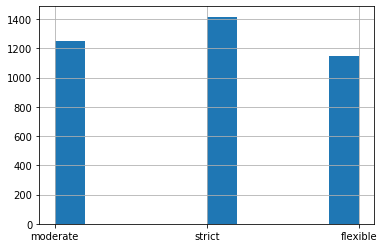

In [29]:
listing['cancellation_policy'].hist();

### More than 1400 reviews are given "strict" for thier payment policy 

We have checked the policy before guests that appears to be strict and moderate both

## Checking review_score_value column

You can check number of ratings given to particular apartments as per it's luxury

In [11]:
apartments = listing.groupby('name').mean()['review_scores_value'].sort_values()
apartments.head(30)

name
Belltown / Downtown Apartment          2.0
Capital Hill Living                    4.0
Center UW Comfy Wood Floor (216)       4.0
Beautiful Craftsman House              4.0
94 walking score BDRM in SLU           4.0
1 BR Apt Steps to Space Needle         5.0
Phinney Ridge Classic Craftsman        6.0
4-Story Modern Home w/ a Lake View!    6.0
Location and View in Queen Anne        6.0
Spacious Fast Internet Walk to UW43    6.0
Vacation rental- Convention Center     6.0
Condo rental room  in downtown!        6.0
Studio Apt with patio, #105            6.0
Across St. UW Tower Hotel Deca 206     6.0
New List Green Lake & Bryant/UW (4     6.0
Capital Hill - modern, 98 Walkscore    6.0
Ted's modern home - 2nd master room    6.0
Turn of the Century Apartment          6.0
Modern Loft in Pike Place              6.0
Cozy Cottage Style                     6.0
condo Seattle, Wa.                     6.0
Daylight basement                      6.0
Viewridge Home                         7.0
2BdRm 

In [216]:
listing['review_scores_value'].unique()

array([10., nan,  9.,  8.,  7.,  6.,  4.,  2.,  5.])

<b>Here we digged in for finding reviews and came up with following solution for data modeling<b>

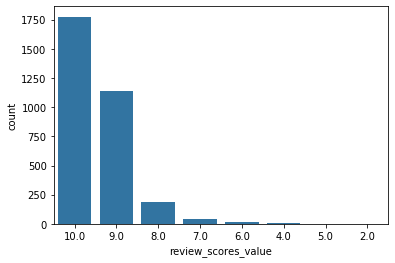

In [227]:
sb.countplot(data = listing, x = 'review_scores_value', color = base_color,
                order = gen_order    );

base_color = sb.color_palette()[0]  
gen_order = listing['review_scores_value'].value_counts().index

More than **1750** people have rated **10** to Seattle Airbnb services

### Q3. For a company's growth, it's necessary to check price data where people have most common interest. So to further more analyze and proceed with same technique next time.  Find price section of what price value is considered to be repeated most in two years i.e. 2016-2017?

# Evaluating Data based on price hiking

### Price Reading in calender.csv

In [4]:
calendar = pd.read_csv('Seattle/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [16]:
calendar.shape


(1393570, 4)

### The price column values is more than 13 million above

In [6]:
price = calendar['price'].reset_index()
price.head()

,index,price
0,0,$85.00
1,1,$85.00
2,2,NaN
3,3,NaN
4,4,NaN


### Dropping PRICE NAN values or missing values

In [7]:
price = calendar.dropna(subset=['price'],axis=0)

price.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


### By dropping rows we get a figure of 900 thousand price values

In [19]:
price.shape

(934542, 4)

### 459,028 units of price are missing in dataset

In [20]:
a = price['price'].unique()
a.shape

(669,)

##  Analyzing most repeated price paid by people in 13 million rows step by step

In [8]:
analyze = price['price'].value_counts().reset_index() 
analyze.head()
          

,index,price
0,$150.00,36646
1,$100.00,31755
2,$75.00,29820
3,$125.00,27538
4,$65.00,26415


In [9]:
# Changing column headings index to method and price to count
analyze.rename(columns={'index':'price', 'price':'times'}, inplace=True)



In [11]:
analyze ['perc'] = analyze['times']/np.sum(analyze['times'])
analyze.head()

,price,times,perc
0,$150.00,36646,0.039213
1,$100.00,31755,0.033979
2,$75.00,29820,0.031909
3,$125.00,27538,0.029467
4,$65.00,26415,0.028265


### From the price data, it helps to get attention of company by finding what price value hikes most in two year of data . Price of **"150.00"** has a high percentage **"0.39 perc"** and it's number shows here **"36646"**